In [15]:
import pandas as pd
import hashlib as hl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

df = pd.read_csv("../athlete_events.csv")

hashes = df["Name"].apply(lambda client_num: hl.sha256(client_num.encode()).hexdigest())
df.insert(1, "SHA Hash Values", hashes)
drop = df.drop(columns= ["Name"])
df = drop

# Tyskland


In [16]:
""" Försöker hitta en kod som sållar bort alla medaljer för teamsporter """

ger_df = df[df["NOC"] == "GER"]

medal = ger_df["Medal"].isin(["Gold", "Silver", "Bronze"])
medals = ger_df[medal]

# fotball = medals["Sport"].isin(["Football"])
# only_fotball = medals[fotball]
# only_fotball.sort_values(by="Year", ascending=False).head(3)

In [17]:
medals

,ID,SHA Hash Values,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1244,702,fbf3c79d0b7326e440e9c4466354a000cf1de31f9ad91f...,M,24.0,184.0,69.0,Germany,GER,2002 Winter,2002,Winter,Salt Lake City,Nordic Combined,Nordic Combined Men's Team,Silver
1246,702,fbf3c79d0b7326e440e9c4466354a000cf1de31f9ad91f...,M,24.0,184.0,69.0,Germany,GER,2002 Winter,2002,Winter,Salt Lake City,Nordic Combined,Nordic Combined Men's Sprint,Silver
1247,702,fbf3c79d0b7326e440e9c4466354a000cf1de31f9ad91f...,M,28.0,184.0,69.0,Germany,GER,2006 Winter,2006,Winter,Torino,Nordic Combined,Nordic Combined Men's Team,Silver
1373,775,5ceb19a2c77a5489c608772f192a88a586cabc7ed052bb...,M,26.0,NaN,NaN,Germany,GER,1936 Summer,1936,Summer,Berlin,Fencing,"Fencing Men's Foil, Team",Bronze
1533,849,839e19c8d4e4fa7d9c0171b35fa1f90b522fb7284f5d49...,M,29.0,189.0,87.0,Germany,GER,2012 Summer,2012,Summer,London,Rowing,Rowing Men's Coxed Eights,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269989,135071,f736677eb54f748665c4487eb7cfa4cba10e8ef24ce4fa...,M,25.0,182.0,80.0,Germany,GER,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Men's 1,000 metres",Gold
270896,135474,0b34faecf5c6ebd7121517cdb9c5a6895b1dfe768692a3...,M,18.0,NaN,NaN,Germany,GER,1908 Summer,1908,Summer,London,Diving,Diving Men's Springboard,Gold
270898,135474,0b34faecf5c6ebd7121517cdb9c5a6895b1dfe768692a3...,M,22.0,NaN,NaN,Germany,GER,1912 Summer,1912,Summer,Stockholm,Diving,Diving Men's Platform,Silver
271009,135520,a78fdcfa1f1c69ecbd9abf7b151d3a25acc5178de12df9...,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold


<BarContainer object of 5 artists>

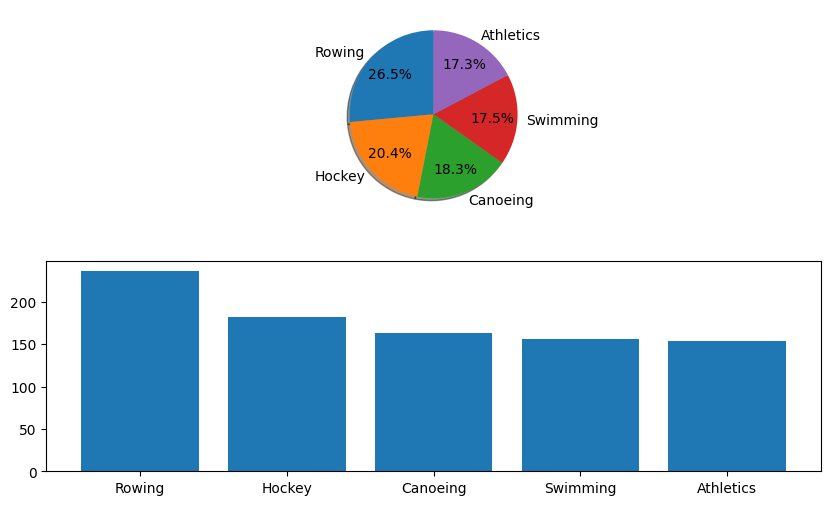

In [19]:
sport_top_5 = medals["Sport"].value_counts().head(5)
sport_top_5


fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].pie(sport_top_5, labels=sport_top_5.index, autopct="%1.1f%%", pctdistance=0.7, startangle=90, shadow=True)

ax[1].bar(sport_top_5.index, sport_top_5.values)

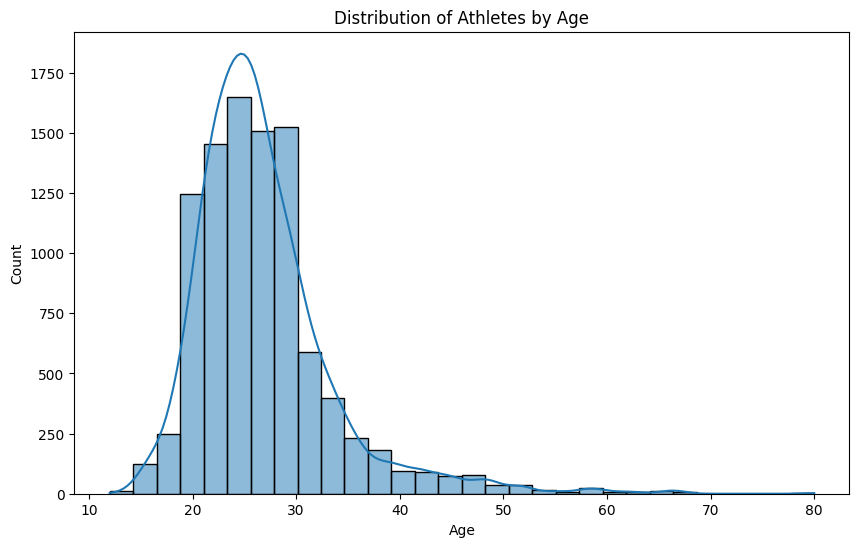

In [20]:
# Distribution of athletes by age
plt.figure(figsize=(10, 6))
sns.histplot(data=ger_df, x="Age", bins=30, kde=True)
plt.title('Distribution of Athletes by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

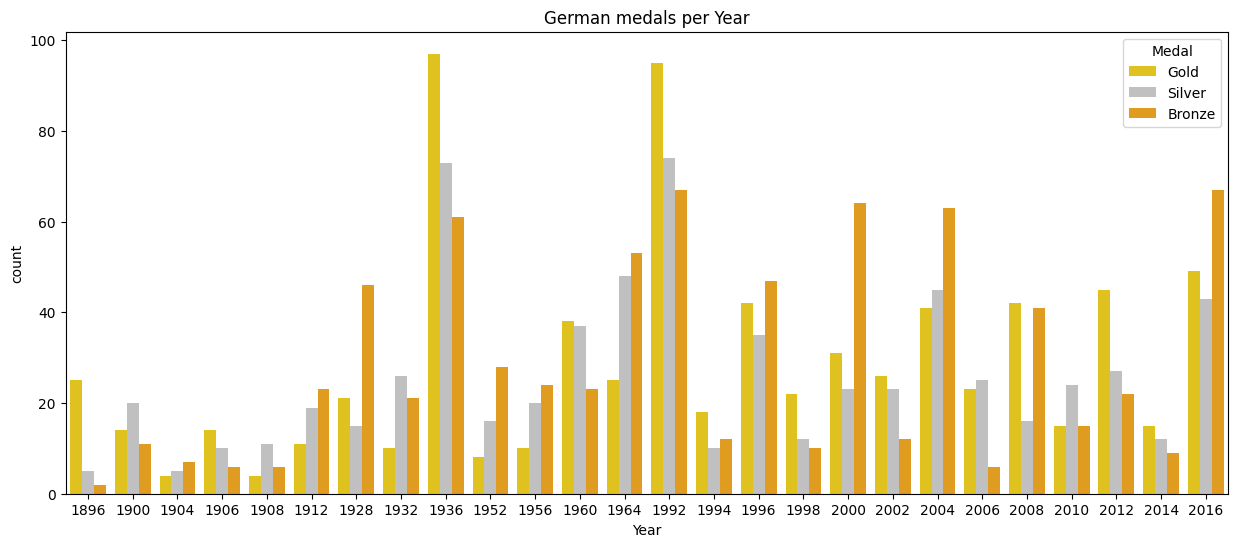

In [21]:
medals
colcor = ["gold", "silver", "orange"]
plt.figure(figsize=(15, 6))
sns.countplot(data=medals, x="Year", hue="Medal", palette=colcor)
plt.title("German medals per Year")
plt.show()

In [22]:
""" Tabell på medaljer per land """


ger_df = pd.concat([ger_df,pd.get_dummies(df["Medal"])],axis = 1)

medals = ger_df.groupby("NOC").sum()[["Gold","Silver","Bronze"]].sort_values("Gold",ascending=False).reset_index()
medals.head()

,NOC,Gold,Silver,Bronze
0,GER,745,674,746


# The Whole World

In [23]:
""" Tabell på medaljer per land top 10 """

df_cleaned_nan = df.dropna(subset=["Medal"])

df_cleaned_nan = pd.concat([df_cleaned_nan, pd.get_dummies(df_cleaned_nan["Medal"], prefix='Medal')], axis=1)

medals = df_cleaned_nan.groupby("NOC").sum()[["Medal_Gold", "Medal_Silver", "Medal_Bronze"]].sort_values("Medal_Gold", ascending=False).reset_index()

medals.head(10)


,NOC,Medal_Gold,Medal_Silver,Medal_Bronze
0,USA,2638,1641,1358
1,URS,1082,732,689
2,GER,745,674,746
3,GBR,678,739,651
4,ITA,575,531,531
5,FRA,501,610,666
6,SWE,479,522,535
7,CAN,463,438,451
8,HUN,432,332,371
9,GDR,397,327,281


Text(0.5, 1.0, 'Gold medals')

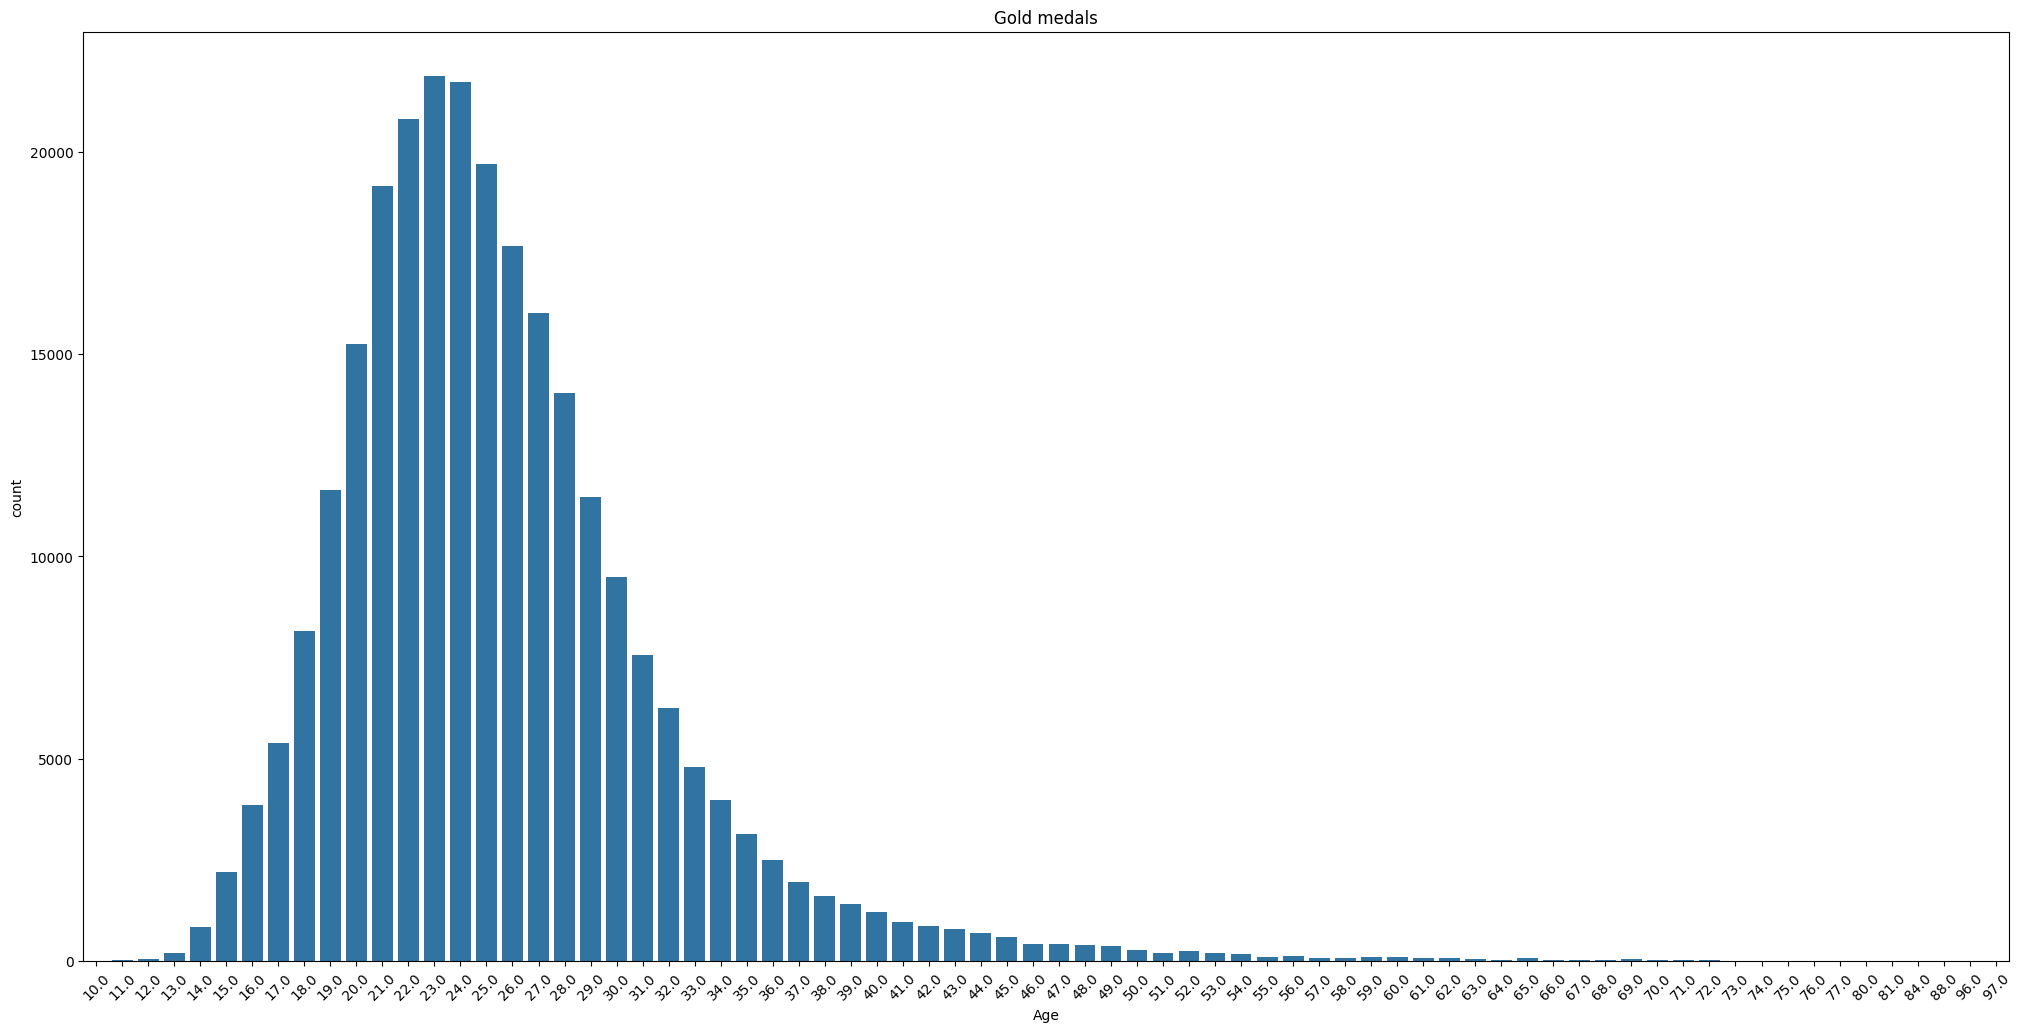

In [24]:
""" Chart på åldern på alla som tagit guld """

""" Röd linje på medelåldern, renskriv koden"""
# age_mean = age1.mean()
# plt.axvline(age_mean, color="r", label="Medel ålder") # Markering på valt värde


gold_medalists = df[df["Medal"] == 'Gold']

plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
plt.tight_layout()
sns.countplot(data=gold_medalists,x=df["Age"])
plt.title("Gold medals")

In [ ]:
""" Hur många sporter det är på vintern"""
winter_sports = athletes_df[athletes_df.Season == 'Winter'].Sport.unique()
winter_sports
""" Hur många sporter det är på sommaren """
summer_sports = athletes_df[athletes_df.Season == 'Summer'].Sport.unique()
summer_sports
"""" Chart kopplat till det"""
plt.figure(figsize=(12,6))
plt.title('Sex distribution among the athletes')
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=150, shadow=True)


# Hur många grena i ett stapeldiagram per år som har spelats, kanske något år som det var väldigt många olika grenar
# Hur många os som har utspelats
# Diiagram på städer som fått ha os


In [ ]:
# Filtrering på alla dubletter som förekommer av valda kolumner
temp_df = df.dropna(subset=["Medal"])
temp_df = df.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"])


# Droppar alla nan i medaljkolumnen, listar alla länder
cleaned_df =temp_df.dropna(subset=["Medal"])
cleaned_df

,ID,SHA Hash Values,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,0a477bb1c5ad39716f9c775e54d18d16aa8b37ada55548...,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,3b70d79488d4343b1563bd30087f1bb2b2690d6a32b43c...,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,3b70d79488d4343b1563bd30087f1bb2b2690d6a32b43c...,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,ae93a503a6f4349bbb966008ad5ed852094c75c4ef1d08...,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,b6842ad32bec75ba8629ef084d111514ea97f859a7ebd5...,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271010,135521,d5b4cb26e89ac0f3fe6ce9971b8e0dba21ccb2eb89d869...,M,23.0,NaN,66.0,Austria,AUT,1924 Summer,1924,Summer,Paris,Weightlifting,Weightlifting Men's Lightweight,Silver
271032,135535,d46f594ecfae07fb31c9490c834765fecbc9217d540473...,F,22.0,181.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,Bronze
271076,135553,57f7def0d4f4cb97348eb47b2c6764eda7a605e01deb83...,F,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold
271078,135553,57f7def0d4f4cb97348eb47b2c6764eda7a605e01deb83...,F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver


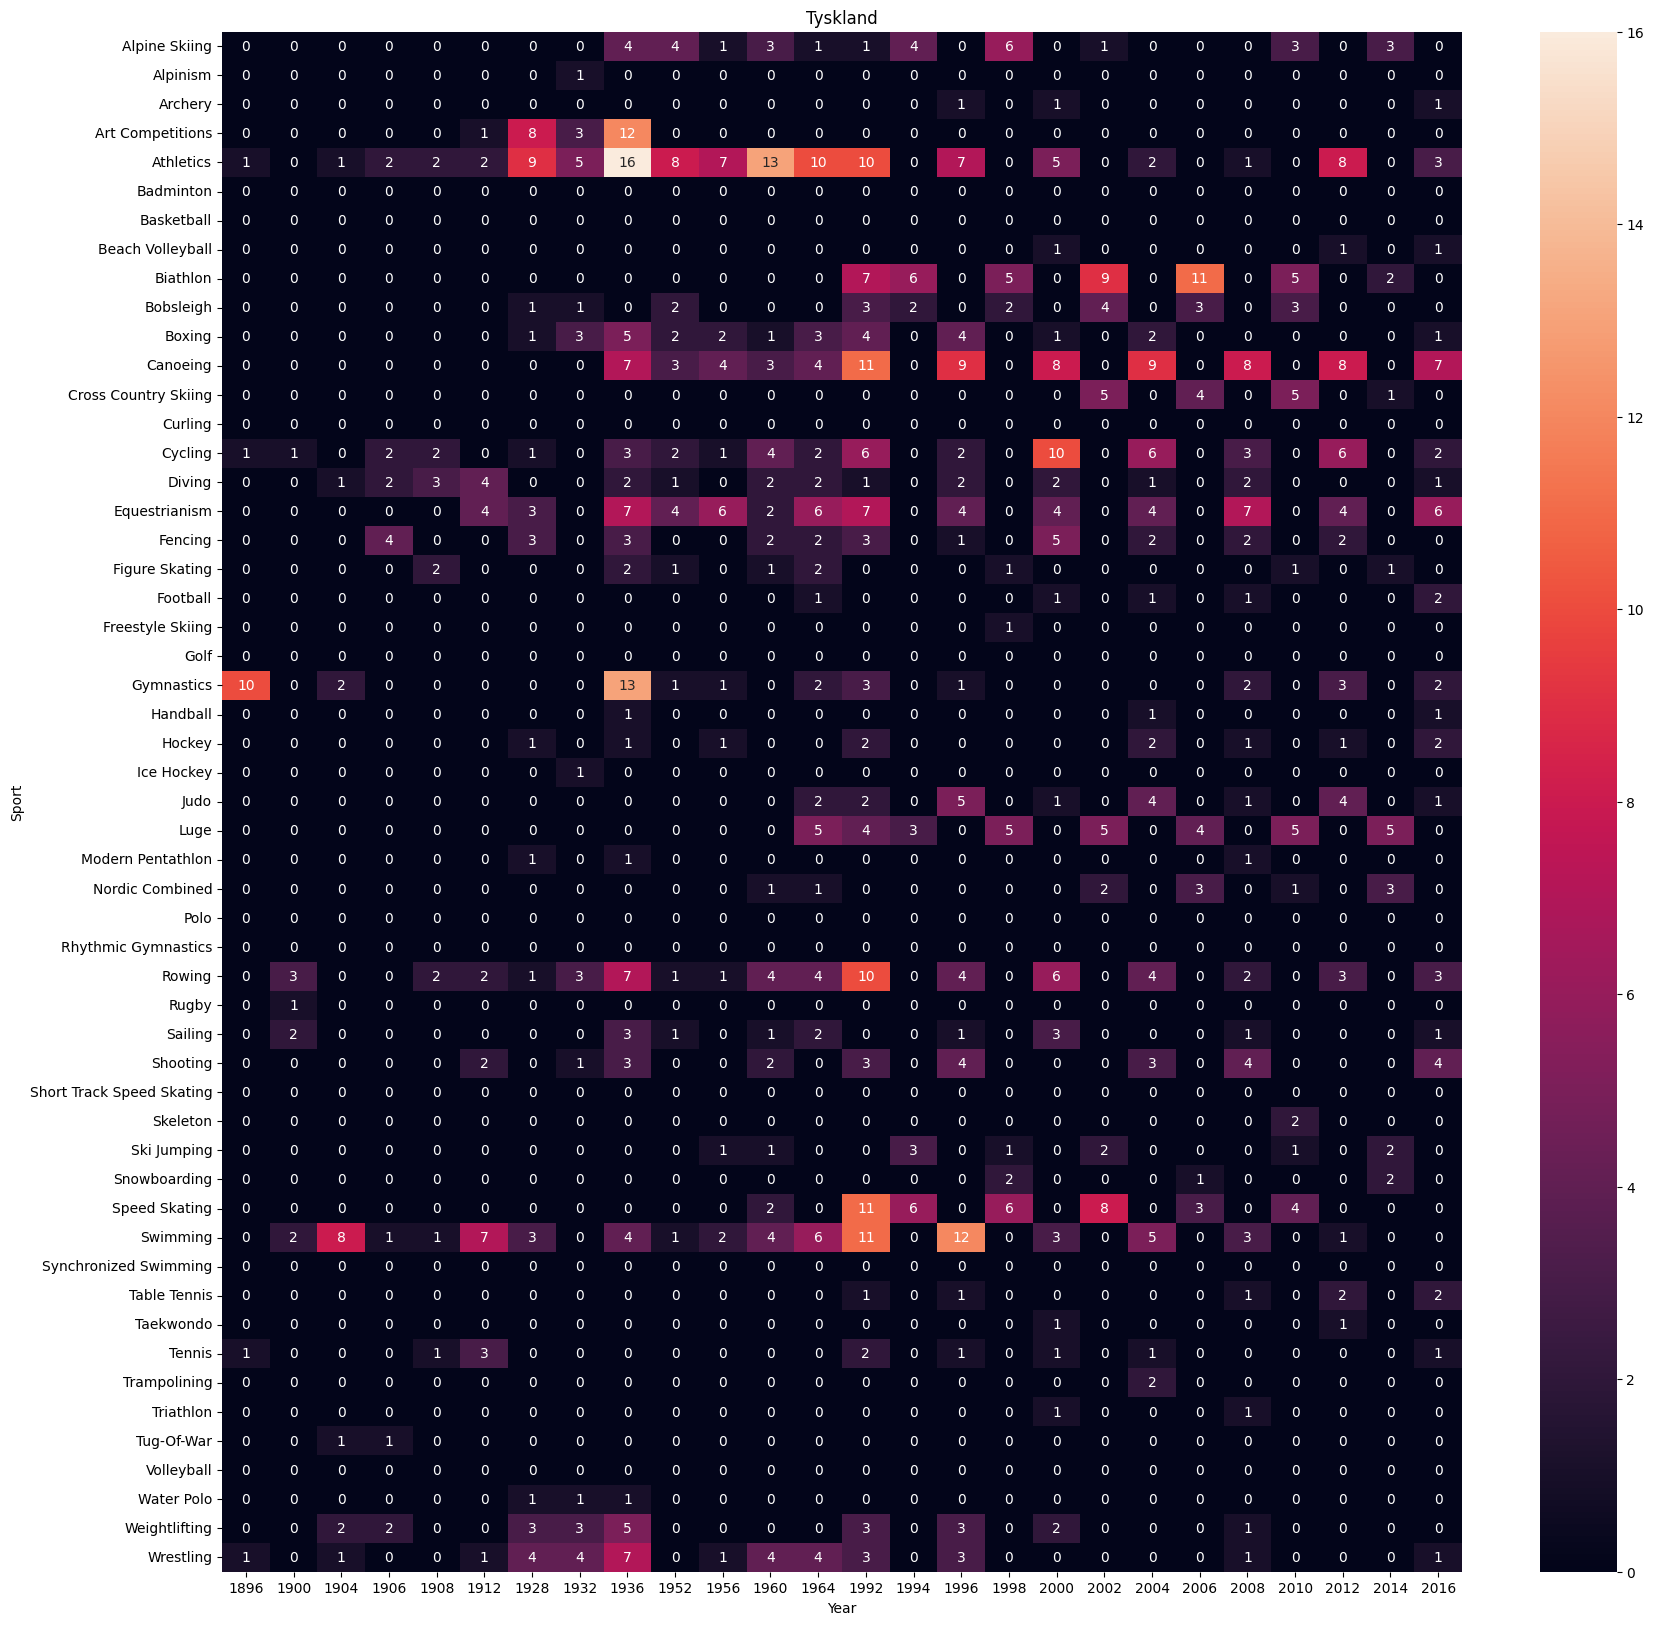

In [50]:
""" Heatmap på alla medaljer Tyskland har gjort i olika idrotter och år """

def country_sport_medal(country):
    new_df = temp_df[temp_df.NOC==country]
    final_df = sns.heatmap(new_df.pivot_table(index="Sport", columns="Year", values="Medal", aggfunc="count").fillna(0),annot=True)
    return final_df

plt.figure(figsize=(20,20))
plt.title("Tyskland")
# Kan byta land om man vill
country_sport_medal("GER")
plt.show()

In [ ]:
""" Top 10 land med flest medaljer, behöver ej läggas upp på dash """
top10 = temp_df.groupby("Team").count().sort_values("Medal", ascending=False)
top10 = top10.head(10)
top10

In [65]:
anime_df = temp_df
temp_df["Got_medal"] = np.where(temp_df["Medal"].isna(), 0, 1)
temp_df

fig = px.bar(temp_df, x="Team", y="Got_medal", color="Team",
  animation_frame="Year", animation_group="Team", range_y=[0,3000])
fig.show()

C:\Users\emil_\AppData\Local\Temp\ipykernel_6632\2014796420.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed